## CS 418 Data Science Project
## Name- 
1. Sai Teja Karnati  -   659365999
2. Vinay Kaushik Kammara - 659954836

<a name="top"></a>Data Science Project 
===
- [Getting Data](#getData)
- [EDA](#eda)
- [Genre Prediction](#genrePred)
- [Recommendation System](#recommend)


<a name='getData'></a>Getting Data
---

In [ ]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
moviesM_URL='https://raw.githubusercontent.com/vinay-kaushik/CS-418-DataScience/master/data/movies_metadata.csv'
movies_metadata=pd.read_csv(moviesM_URL)
movies_metadata.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

## IMDB Dataset EDA, Genre prediction 


In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies_metadata.original_language.value_counts().sort_values()

eo           1
si           1
104.0        1
82.0         1
ay           1
         ...  
de        1080
ja        1350
it        1529
fr        2438
en       32269
Name: original_language, Length: 92, dtype: int64

In [ ]:
def group_indices(series,index="id"):
    d={}
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:
            d.setdefault(x[index],[])
            d[x[index]].append(i)
    return d

def multi_count(series,index="id"):
    return {k:len(v) for (k,v) in group_indices(series,index).items()}

def expand_multiple_feature(df,column,index="id"):
    groups=group_indices(df[column],index=index)
    result=pd.DataFrame()
    for name,indices in groups.items():
        rows=df.iloc[indices].copy()
        rows[column]=name
        result=result.append(rows)
    return result

<a name='eda'></a>Exploratory Data Analysis
---

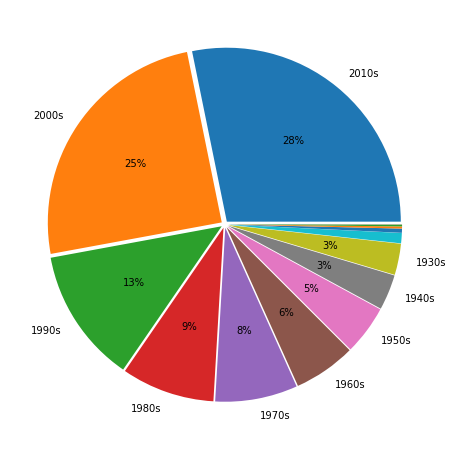

In [ ]:
# numbers of movies released in each decade
def count_pie(series,filename):
    counts=series.value_counts()
    counts=counts/counts.sum()
    labels=['' if num<0.01 else str(year) for (year,num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] < 100 else 0.001 for i in range(counts.size)]
    plt.pie(counts,labels=labels,autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '',explode=explode)
    #if saving:plt.savefig(filename,dpi=150)
    plt.show()

def count_decade_pie(df,filename):
    count_pie(df.release_date.dropna().apply(lambda x:str(int(x[:4])//10*10)+'s'),filename)
    
count_decade_pie(movies_metadata,filename="pie_decade.png")

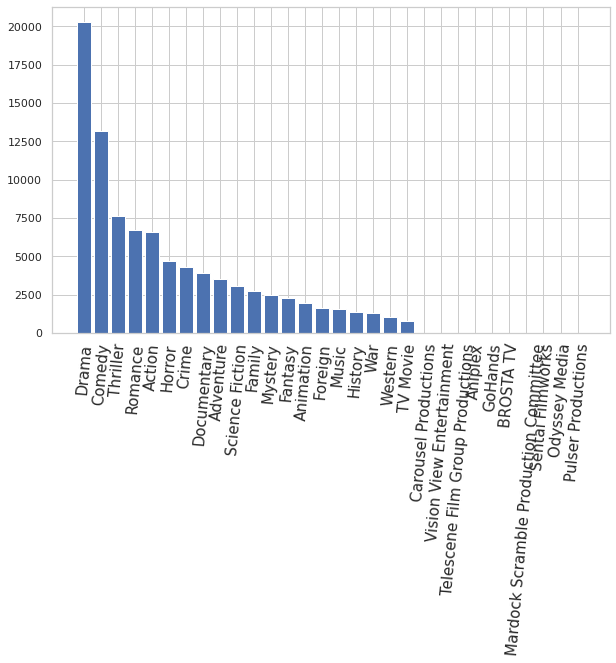

In [ ]:
# numbers of movies of different genres and keywords
def multi_bar(series,filename):    
    sns.set(style="whitegrid")
    count=multi_count(series,"name")
    count=sorted(count.items(),key=lambda x:x[1],reverse=True)
    count=dict(count[:30])
    f, ax = plt.subplots(figsize=(10, 6))
    plt.xticks(rotation=85, fontsize=15)
    plt.bar(count.keys(),count.values(),align="center")
#     plt.pie(count.values(),labels=count.keys())
    #if saving:plt.savefig(filename,bbox_inches="tight",dpi=100)
    plt.show()

multi_bar(movies_metadata.genres,filename="bar_genres.png")

In [ ]:
top_movies = movies_metadata.sort_values(by='revenue', ascending=False)
top_movies.head(10)[['title', 'revenue']]

,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09
28830,Furious 7,1.506249e+09
26558,Avengers: Age of Ultron,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09
22110,Frozen,1.274219e+09
42222,Beauty and the Beast,1.262886e+09


In [ ]:
movies_eda=movies_metadata

movies_eda=movies_eda[movies_eda['revenue'].notnull()]

movies_eda['revenue']=movies_eda['revenue'].astype('int')
movies_eda['budget']=movies_eda['budget'].astype('int')
movies_eda['profit'] = movies_eda.apply(lambda row: row['revenue'] - row['budget'], axis=1)

In [ ]:
movies_eda["profit"].sort_values()

21175    -165710090
32849    -150000000
14823    -150000000
43190    -125000000
27656    -120000000
            ...    
28830    1316249360
25084    1363528810
1639     1645034188
26555    1823223624
14551    2550965087
Name: profit, Length: 45460, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


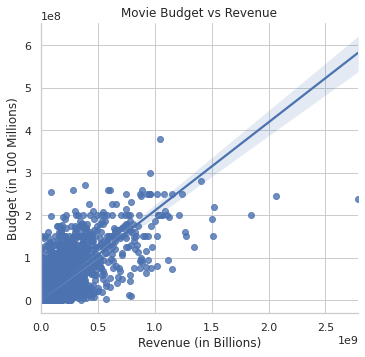

In [ ]:
sns.lmplot('revenue', 'budget', data=movies_eda)
plt.title('Movie Budget vs Revenue')
plt.xlabel('Revenue (in Billions)')
plt.ylabel('Budget (in 100 Millions)')
plt.show()

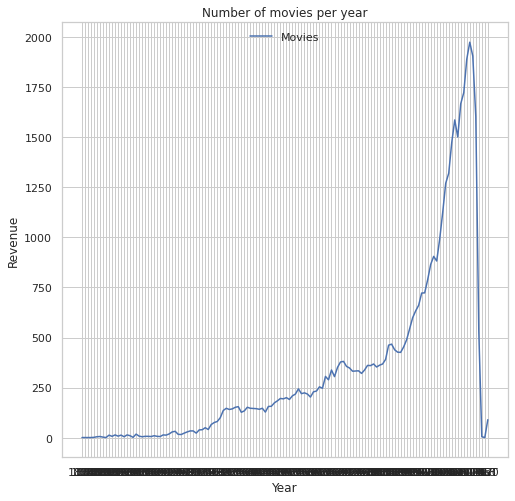

In [ ]:
movies_eda=movies_metadata

movies_eda['release_date_year'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

plt.figure(figsize=(8, 8))
dataTrain = movies_eda['release_date_year'].value_counts().sort_index()
# dataTrain = movies_eda['release_date_year'].value_counts().sort_index()
plt.plot(dataTrain.index, dataTrain.values, label='Movies')
plt.title('Number of movies per year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(loc='upper center', frameon=False)
plt.show()

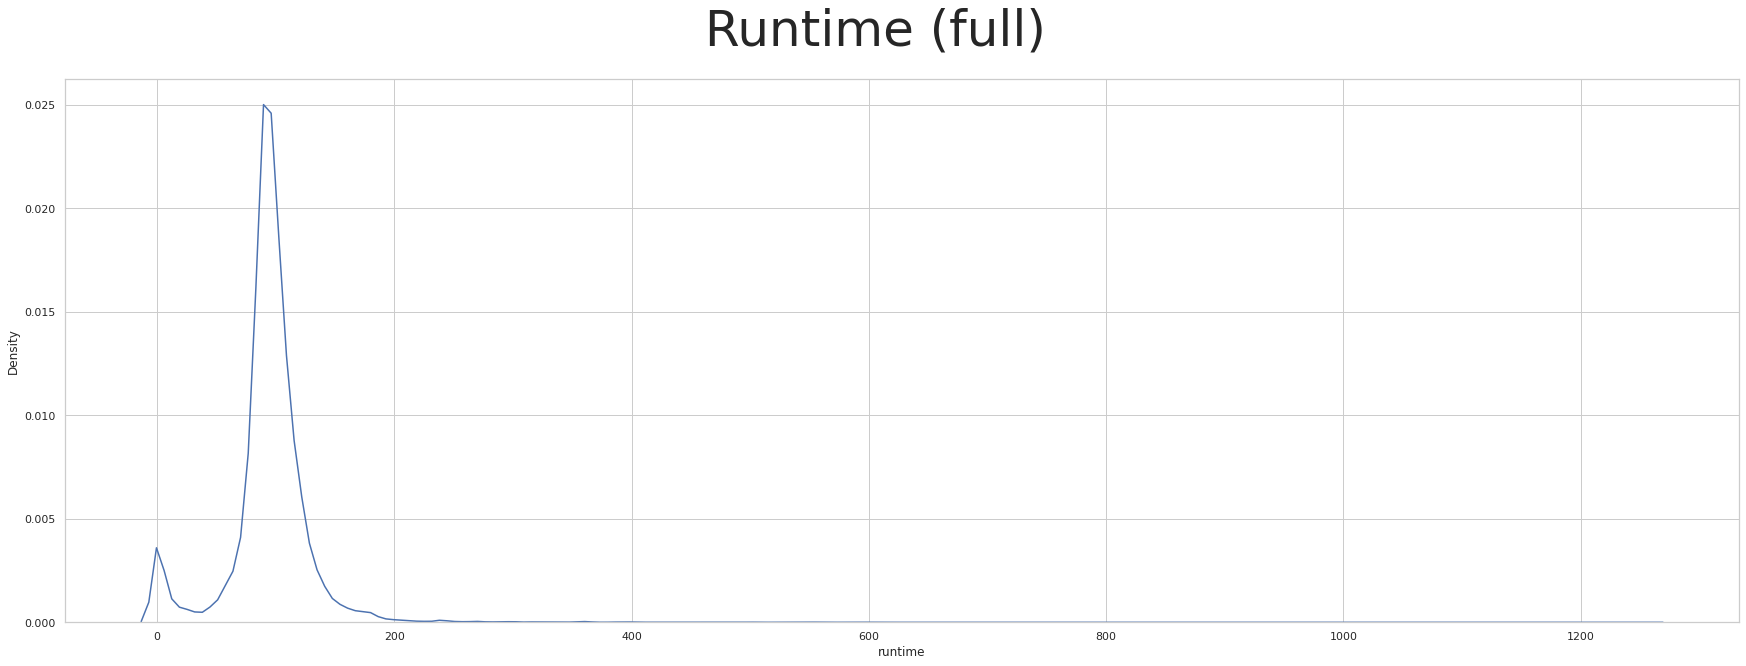

In [ ]:
fig = plt.figure(figsize = (30, 10))
movies_eda['runtime'].fillna(movies_eda['runtime'].mean(), inplace=True)
sns.kdeplot(movies_eda['runtime'])
fig.suptitle('Runtime (full)', fontsize=50)
plt.show()

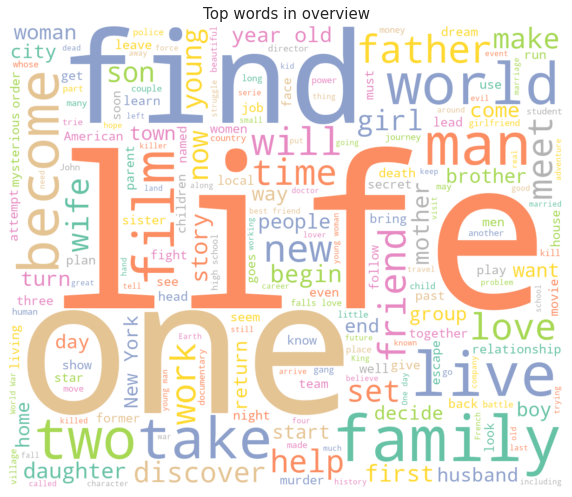

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (10, 10))
text = ' '.join(movies_eda['overview'].fillna('').values)
wordcloud = WordCloud(margin=10, background_color='white', colormap='Set2', width=1200, height=1000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words in overview', fontsize=15)
plt.axis('off')
plt.show()

In [ ]:
import re
allGenreSet= set()
genreList = []
finalDataFrame = pd.DataFrame(columns=['id', 'Plot', 'Genre','Movie Name'])
for i in range(3000):
  genreList = re.findall('name\': \'(.*?)\'}', (movies_metadata["genres"][i]),re.DOTALL)
  allGenreSet.update(genreList)
  finalDataFrame.loc[i] = [i,movies_metadata["overview"][i],genreList,movies_metadata['original_title'][i]]

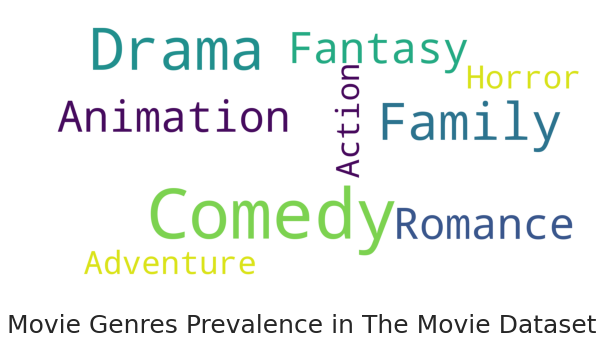

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=9,
        max_font_size=50, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=25)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(finalDataFrame['Genre'], title = 'Movie Genres Prevalence in The Movie Dataset')

<a name='genrePred'></a>Genre Prediction
---

In [ ]:
allGenreList = list(allGenreSet)
allGenreList

['Drama',
 'Horror',
 'History',
 'Adventure',
 'Documentary',
 'Romance',
 'Action',
 'Family',
 'TV Movie',
 'Crime',
 'Science Fiction',
 'Thriller',
 'Music',
 'Western',
 'Animation',
 'Mystery',
 'War',
 'Foreign',
 'Comedy',
 'Fantasy']

In [ ]:
#cleaned dataframe for our reference
finalDataFrame.head(5)

,id,Plot,Genre,Movie Name
0,0,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",Toy Story
1,1,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",Jumanji
2,2,A family wedding reignites the ancient feud be...,"[Romance, Comedy]",Grumpier Old Men
3,3,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]",Waiting to Exhale
4,4,Just when George Banks has recovered from his ...,[Comedy],Father of the Bride Part II


In [ ]:
#prepaing Y for predicitons
from sklearn.preprocessing import MultiLabelBinarizer
MLB_Model=MultiLabelBinarizer() 
Y=MLB_Model.fit_transform(finalDataFrame["Genre"])

In [ ]:
MLB_Model.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [ ]:
Y.shape

(3000, 20)

In [ ]:
Y[0] #  Which means , the movie is Animation, Comedy and Family

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#preparing X,
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
content=[]
#Preprocessing the plot for vectorizations
for i in range(3000):
    plt=str(finalDataFrame["Plot"][i]) +" "+ str(finalDataFrame["Movie Name"][i])
    plt = plt.translate(str.maketrans('', '', string.punctuation))
    plt = re.sub("[^-9A-Za-z ]", "" , plt)
    plt = "".join([i.lower() for i in plt if i not in string.punctuation])
    content.append(plt) 

In [ ]:
content[0]

'led by woody andys toys live happily in his room until andys birthday brings buzz lightyear onto the scene afraid of losing his place in andys heart woody plots against buzz but when circumstances separate buzz and woody from their owner the duo eventually learns to put aside their differences toy story'

In [ ]:
#removing words that are too repetitive in a all docs(like "the" and "a") and removing extremely rare words (like actor names) which dont add value.
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(content)

In [ ]:
X.shape

(3000, 1235)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_converter = TfidfTransformer()
X_Tf = tfidf_converter.fit_transform(X)
X_Tf.shape

(3000, 1235)

In [ ]:
mask_Boolean = np.random.rand(X_Tf.shape[0]) < 0.8


In [ ]:
mask_Boolean

array([ True, False,  True, ...,  True,  True, False])

In [ ]:
#randomly applying mask and extracting test data
X_train_Tf=X_Tf[mask_Boolean]
X_test_Tf=X_tfidf[~mask_Boolean]
Y_train=Y[mask_Boolean]
Y_test=Y[~mask_Boolean]
positions=range(3000)
# print positions
test_movies=np.asarray(positions)[~mask_Boolean]
# test_movies

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

In [ ]:
parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1.0]}
gridSearchCV = GridSearchCV(SVC(class_weight='balanced'), parameters, scoring=make_scorer(f1_score, average='micro'))
myModel2 = OneVsRestClassifier(gridSearchCV)

myModel2.fit(X_train_tfidf, Y_train)

OneVsRestClassifier(estimator=GridSearchCV(cv=None, error_score=nan,
                                           estimator=SVC(C=1.0,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight='balanced',
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='scale',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=False,
                                                         random_state=None,
                                                 

In [ ]:
predstfidf=classif.predict(X_test_tfidf)

In [ ]:
print(classification_report(Y_test, predstfidf, target_names=MLB_Model.classes_))

                 precision    recall  f1-score   support

         Action       0.41      0.63      0.50       101
      Adventure       0.39      0.59      0.47        88
      Animation       0.26      0.28      0.27        18
         Comedy       0.50      0.57      0.53       203
          Crime       0.12      1.00      0.21        67
    Documentary       0.62      0.44      0.52        18
          Drama       0.64      0.61      0.62       294
         Family       0.29      0.49      0.36        69
        Fantasy       0.21      0.30      0.24        53
        Foreign       0.00      0.00      0.00         6
        History       0.16      0.36      0.22        14
         Horror       0.39      0.59      0.47        54
          Music       0.23      0.19      0.21        26
        Mystery       0.00      0.00      0.00        39
        Romance       0.52      0.49      0.51       128
Science Fiction       0.42      0.45      0.44        69
       TV Movie       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
MLB_Model.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [ ]:
predstfidf[19]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
np.dot(predstfidf[18],MLB_Model.classes_)

'AdventureComedyCrimeDrama'

In [ ]:
content[18:20]

['summoned from an ashram in tibet ace finds himself on a perilous journey into the jungles of africa to find shikaka the missing sacred animal of the friendly wachati tribe he must accomplish this before the wedding of the wachatis princess to the prince of the warrior wachootoos if ace fails the result will be a vicious tribal war ace ventura when nature calls']

In [ ]:
finalDataFrame[18:20]

,id,Plot,Genre,Movie Name
18,18,"Summoned from an ashram in Tibet, Ace finds hi...","[Crime, Comedy, Adventure]",Ace Ventura: When Nature Calls
19,19,A vengeful New York transit cop decides to ste...,"[Action, Comedy, Crime]",Money Train


In [ ]:
mask_Boolean[:20]

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False])

<a name='recommend'></a><b>Recommendation System</b>


`References

1. <a href='https://towardsdatascience.com/how-to-build-a-movie-recommendation-system-67e321339109#:~:text=as%20a%20base.-,A)%20Content%2DBased%20Movie%20Recommendation%20Systems,movie%2C%20similar%20movies%20are%20recommended.&text=With%20this%20in%20mind%2C%20the,recommender%20system%20is%20movie%20attributes.'> Towards DataScience
2. <a href='https://www.kaggle.com/rounakbanik/movie-recommender-systems'> Kaggle

---

In [ ]:
#movies_df=movies_metadata

In [ ]:
movies_vote_df=movies_metadata[['genres','title','release_date','vote_average','vote_count']]
movies_vote_df.head(4)

,genres,title,release_date,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,1995-10-30,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,1995-12-15,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,1995-12-22,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,1995-12-22,6.1,34.0


In [ ]:
count_null=0
for val in movies_vote_df['vote_count'].notnull():
    if not val:
        count_null+=1
print('Null in vote count= ',count_null)


Null in vote count=  6


In [ ]:
movies_vote_df=movies_vote_df[movies_vote_df['vote_count'].notnull()]
movies_vote_df['vote_count'].count()

45460

In [ ]:
quantile=movies_vote_df['vote_count'].astype('int').quantile(0.95)
print(quantile)

434.0


In [ ]:
vote_average_mean=movies_vote_df['vote_average'].astype('int').mean()
print(vote_average_mean)

5.244896612406511


In [ ]:
def overall_rating(df):
    return (df['vote_count']/(df['vote_count']+quantile) * df['vote_average']) + (df['vote_average']/(df['vote_average']+df['vote_count']) * vote_average_mean)

In [ ]:
movies_sort_rating = movies_vote_df[(movies_vote_df['vote_count'] >= quantile) & (movies_vote_df['vote_count'].notnull()) & (movies_vote_df['vote_average'].notnull())][['title', 'vote_count', 'vote_average', 'genres']]
# movies_sort_rating = movies_vote_df[ (movies_vote_df['vote_count'].notnull()) & (movies_vote_df['vote_average'].notnull())][['title', 'vote_count', 'vote_average', 'genres']]
movies_sort_rating['vote_count']=movies_sort_rating['vote_count'].astype('int')
movies_sort_rating['vote_average']=movies_sort_rating['vote_average'].astype('int')

In [ ]:
movies_sort_rating['overall_rating']=movies_sort_rating.apply(overall_rating,axis=1)

In [ ]:
movies_sort_rating = movies_sort_rating.sort_values('overall_rating', ascending=False)

In [ ]:
movies_sort_rating.head(10)

,title,vote_count,vote_average,genres,overall_rating
15480,Inception,14075,8,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",7.763680
12481,The Dark Knight,12269,8,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",7.730096
22879,Interstellar,11187,8,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",7.704979
2843,Fight Club,9678,8,"[{'id': 18, 'name': 'Drama'}]",7.660978
4863,The Lord of the Rings: The Fellowship of the Ring,8892,8,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.632422
292,Pulp Fiction,8670,8,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",7.623464
314,The Shawshank Redemption,8358,8,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",7.610111
7000,The Lord of the Rings: The Return of the King,8226,8,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.604172
351,Forrest Gump,8147,8,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",7.600530
5814,The Lord of the Rings: The Two Towers,7641,8,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.575517


In [ ]:
len(movies_sort_rating)
movies_genre_list=movies_sort_rating

from ast import literal_eval
# Returns the list top l elements or entire list; whichever is more.
genreSet=set()
def get_list(x, l=5):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than l elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > l:
            names = names[:l]
        for na in names:
            genreSet.add(na)
        return names

    #Return empty list in case of missing/malformed data
    return []

movies_genre_list['genres'] = movies_genre_list['genres'].apply(literal_eval)
movies_genre_list['genres'] = movies_genre_list['genres'].apply(get_list)

In [ ]:

# Top 5 movies according to the rating
movies_genre_list.head(5)

,title,vote_count,vote_average,genres,overall_rating
15480,Inception,14075,8,"[Action, Thriller, Science Fiction, Mystery, A...",7.763680
12481,The Dark Knight,12269,8,"[Drama, Action, Crime, Thriller]",7.730096
22879,Interstellar,11187,8,"[Adventure, Drama, Science Fiction]",7.704979
2843,Fight Club,9678,8,[Drama],7.660978
4863,The Lord of the Rings: The Fellowship of the Ring,8892,8,"[Adventure, Fantasy, Action]",7.632422


In [ ]:
# Movies with worst rating
movies_genre_list.tail(5)

,title,vote_count,vote_average,genres,overall_rating
10135,Bewitched,463,4,"[Comedy, Fantasy, Romance]",2.109584
11012,My Super Ex-Girlfriend,453,4,"[Fantasy, Drama, Action, Comedy, Crime]",2.088748
1486,Speed 2: Cruise Control,439,4,"[Action, Adventure, Thriller]",2.058813
21238,Sharknado,484,3,"[TV Movie, Horror]",1.614009
13566,Dragonball Evolution,475,2,"[Action, Adventure, Fantasy, Science Fiction, ...",1.067096


In [ ]:
print('Different Types of Genres available are ', genreSet)

Different Types of Genres available are  {'Drama', 'Horror', 'History', 'Adventure', 'Documentary', 'Romance', 'Action', 'Family', 'TV Movie', 'Crime', 'Science Fiction', 'Thriller', 'Music', 'Western', 'Animation', 'Mystery', 'War', 'Comedy', 'Fantasy'}


In [ ]:
s = movies_genre_list.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genre_group = movies_genre_list.drop('genres', axis=1).join(s)

In [ ]:
genre_group.head(5)

,title,vote_count,vote_average,overall_rating,genre
0,Toy Story,5415,7,6.487366,Animation
0,Toy Story,5415,7,6.487366,Comedy
0,Toy Story,5415,7,6.487366,Family
1,Jumanji,2413,6,5.098362,Adventure
1,Jumanji,2413,6,5.098362,Fantasy


In [ ]:
def show_movie_genre(genre):
    df = genre_group[genre_group['genre'] == genre]
    vote_average_mean_genre=df[df['vote_average'].notnull()]['vote_average'].astype('int').mean()
    quantile_genre=df[df['vote_count'].notnull()]['vote_count'].astype('int').quantile(0.85)

    movie_sort_genre_df = df[(df['vote_count'] >= quantile_genre) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'vote_count', 'vote_average']]
    movie_sort_genre_df['overall_rating']=movie_sort_genre_df.apply(lambda x: (x['vote_count']/(x['vote_count']+quantile_genre) * x['vote_average']) + (quantile_genre/(quantile_genre+x['vote_count']) * vote_average_mean_genre),axis=1)
    movie_sort_genre_df=movie_sort_genre_df.sort_values('overall_rating',ascending=False)
    return movie_sort_genre_df

In [ ]:
show_movie_genre('Action').head(5)

,title,vote_count,vote_average,overall_rating
15480,Inception,14075,8,7.572619
12481,The Dark Knight,12269,8,7.524241
4863,The Lord of the Rings: The Fellowship of the Ring,8892,8,7.396502
7000,The Lord of the Rings: The Return of the King,8226,8,7.362759
5814,The Lord of the Rings: The Two Towers,7641,8,7.329846


In [ ]:
show_movie_genre('Animation').head(5)

,title,vote_count,vote_average,overall_rating
359,The Lion King,5520,8,7.363322
5481,Spirited Away,3968,8,7.228047
13724,Up,7048,7,6.778303
30315,Inside Out,6737,7,6.771459
15472,Despicable Me,6595,7,6.768191


In [ ]:

short_movie_metadata=movies_metadata[:22000]
short_movie_metadata['tagline'] = short_movie_metadata['tagline'].fillna('')
short_movie_metadata['description'] = short_movie_metadata['overview'] + short_movie_metadata['tagline']
short_movie_metadata['description'] = short_movie_metadata['description'].fillna('')

In [ ]:


short_movie_metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_date_year,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7.7,5415.0,1995,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,A family wedding reignites the ancient feud be...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(short_movie_metadata['description'])



In [ ]:
tfidf_matrix.shape

(22000, 593020)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
short_movie_metadata = short_movie_metadata.reset_index()
titles = short_movie_metadata['title']
indices = pd.Series(short_movie_metadata.index, index=short_movie_metadata['title'])

In [ ]:
indices.head(10)

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

In [ ]:
def recommend_movie_for_title(title):
    sim_scores = list(enumerate(cosine_sim[indices[title]]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
recommend_movie_for_title('Batman Begins').head(5)

21400                      Batman: Mystery of the Batwoman
3095                          Batman: Mask of the Phantasm
19792              Batman: The Dark Knight Returns, Part 1
21194    Batman Unmasked: The Psychology of the Dark Kn...
150                                         Batman Forever
Name: title, dtype: object